# **PW Skills Assignment: Data Analytitcs: Logistic Regression**

## **Theoretical**

1. What is Logistic Regression, and how does it differ from Linear Regression?

Ans:
* Logistic Regression is used for classification tasks.

* Linear Regression is used for regression (predicting continuous values).

* Logistic Regression outputs probabilities using a sigmoid function, while Linear Regression gives continuous outputs.

Example: Predicting if an email is spam (1) or not (0).

2. What is the mathematical equation of Logistic Regression?

Ans: The **mathematical equation** of Logistic Regression is:

$$
P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n)}}
$$

### Explanation:

* It uses the **sigmoid function** to convert linear output into probability.
* $\beta_0$ is the intercept, and $\beta_1, \beta_2, ..., \beta_n$ are coefficients.
* Output is between **0 and 1**, interpreted as probability.


3. Why do we use the Sigmoid function in Logistic Regression?

Ans: The Sigmoid function maps any real number to a value between 0 and 1, making it suitable for probability outputs.

**Example:** If the model output is 2, sigmoid(2) ≈ 0.88 (interpreted as 88% probability of class 1).

4. What is the cost function of Logistic Regression?

Ans: The **cost function** of Logistic Regression is called **Log Loss** or **Binary Cross-Entropy**:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$

### Explanation (Pointwise):

* $m$: Number of training examples
* $y^{(i)}$: Actual label (0 or 1)
* $h_\theta(x^{(i)})$: Predicted probability from the sigmoid function
* Measures **how far** predicted values are from the actual values.
* Lower cost means **better model fit**.

### Example:

If the true label is 1 and predicted probability is 0.9, cost is low.
If predicted probability is 0.1, cost is high.


5. What is Regularization in Logistic Regression? Why is it needed?

Ans: **Regularization** in Logistic Regression is a technique to **penalize large coefficients** in the model to **reduce overfitting**.



### Why It’s Needed (Pointwise):

* Prevents the model from learning **noise or irrelevant patterns**.
* Encourages **simpler models** that generalize better on new data.
* Helps when features are **correlated** or the dataset is **small**.



### Types of Regularization:

* **L1 (Lasso):** Shrinks some coefficients to zero (feature selection).
* **L2 (Ridge):** Shrinks coefficients closer to zero but keeps all.
* **Elastic Net:** Combines L1 and L2.


### Example:

If your model has many features with high weights, it may fit training data too well but perform poorly on test data.
Regularization reduces those weights to make the model more **robust**.


6. Explain the difference between Lasso, Ridge, and Elastic Net regression.
 Ans: * Lasso (L1): Shrinks some coefficients to zero (feature selection).

* Ridge (L2): Shrinks coefficients but none to zero.

* Elastic Net: Combines L1 and L2.



7. When should we use Elastic Net instead of Lasso or Ridge?

Ans: Use Elastic Net when there are many correlated features; it combines L1 and L2 penalties for better performance.

8. What is the impact of the regularization parameter (λ) in Logistic Regression?

Ans: λ (lambda) controls the strength of regularization.

* High λ = more penalty, simpler model, less overfitting.

* Low λ = less penalty, more complex model, risk of overfitting.

9. What are the key assumptions of Logistic Regression?
Independent observations.

Ans:
* Binary dependent variable (for binary logistic regression).

* Linearity between independent variables and log-odds.

* No extreme outliers.

* Large sample size.

10. What are some alternatives to Logistic Regression for classification tasks?

Ans:
* Decision Trees

* Random Forests

* Support Vector Machines (SVM)

* Naive Bayes

* Neural Networks

11. What are Classification Evaluation Metrics?

Ans:
* Accuracy

* Precision

* Recall

* F1-Score

* ROC-AUC

* Confusion Matrix

12. How does class imbalance affect Logistic Regression?


Ans: Class imbalance can cause the model to be biased towards the majority class, reducing performance on the minority class.

13. What is Hyperparameter Tuning in Logistic Regression?


Ans: Adjusting model parameters (like C, penalty) to find the best performance.

14. What are different solvers in Logistic Regression? Which one should be used?



Ans: In Logistic Regression, solvers are optimization algorithms used to find the best model parameters (coefficients).



**Use:**

* For small/binary problems: liblinear

* For large datasets: lbfgs or saga

* For L1 or ElasticNet regularization: saga only

* For multiclass problems: lbfgs or saga

15. How is Logistic Regression extended for multiclass classification?


Ans: Using One-vs-Rest (OvR) or Softmax (multinomial) strategies.

16. What are the advantages and disadvantages of Logistic Regression?


Ans: **Advantages**:

* Simple, fast, interpretable.

* Works well for linearly separable data.


**Disadvantages:**

* Not suitable for complex relationships.

* Assumes linearity in log-odds.

17. What are some use cases of Logistic Regression?


Ans:
* Spam detection (email: spam/not spam)

* Disease prediction (sick/not sick)

* Customer churn prediction (churn/no churn)

18. What is the difference between Softmax Regression and Logistic Regression?


ans: **Softmax Regression**: Used for multiclass classification.

**Logistic Regression**: Used for binary classification.

19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?


Ans: **OvR:** Simpler, works for most cases.



**Softmax:** Preferred for true multiclass problems with mutual exclusivity.

20. How do we interpret coefficients in Logistic Regression?

Ans:
* Positive → increases log-odds

* Negative → decreases log-odds

** Use exp(coef_) to interpret as odds ratio

## **Practical**

In [1]:
#1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy.

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [2]:
#2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy.

model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=200)
model.fit(X_train, y_train)
print("L1 Regularization Accuracy:", model.score(X_test, y_test))


L1 Regularization Accuracy: 1.0


In [3]:
#3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2'). Print model accuracy and coefficients.

model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=200)
model.fit(X_train, y_train)
print("L2 Regularization Accuracy:", model.score(X_test, y_test))
print("Coefficients:", model.coef_)


L2 Regularization Accuracy: 1.0
Coefficients: [[ 0.3711229   1.409712   -2.15210117 -0.95474179]
 [ 0.49400451 -1.58897112  0.43717015 -1.11187838]
 [-1.55895271 -1.58893375  2.39874554  2.15556209]]


In [4]:
#4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet').

model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=200)
model.fit(X_train, y_train)
print("Elastic Net Accuracy:", model.score(X_test, y_test))


Elastic Net Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [5]:
#5. Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'.

model = LogisticRegression(multi_class='ovr', max_iter=200)
model.fit(X_train, y_train)
print("OvR Multiclass Accuracy:", model.score(X_test, y_test))


OvR Multiclass Accuracy: 0.9666666666666667


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [6]:
#6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy.

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=3)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Params: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.9500000000000001


In [7]:
#7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy.

from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(LogisticRegression(max_iter=200), X, y, cv=skf)
print("Average Stratified K-Fold Accuracy:", scores.mean())


Average Stratified K-Fold Accuracy: 0.9733333333333334


In [8]:
#8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.

import pandas as pd

# df = pd.read_csv('your_file.csv')
# X = df.drop('target', axis=1)
# y = df['target']
# For demonstration, using iris data
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
print("CSV Data Accuracy:", model.score(X_test, y_test))


CSV Data Accuracy: 1.0


In [11]:
#9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy.

from sklearn.model_selection import RandomizedSearchCV

param_dist = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
random_search = RandomizedSearchCV(LogisticRegression(max_iter=200), param_distributions=param_dist, n_iter=5, cv=3)
random_search.fit(X_train, y_train)
print("Best Params:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


Best Params: {'solver': 'saga', 'penalty': 'l1', 'C': 1}
Best Accuracy: 0.9666666666666667


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

In [12]:
#10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.

from sklearn.multiclass import OneVsOneClassifier

ovo = OneVsOneClassifier(LogisticRegression(max_iter=200))
ovo.fit(X_train, y_train)
print("OvO Multiclass Accuracy:", ovo.score(X_test, y_test))


OvO Multiclass Accuracy: 1.0


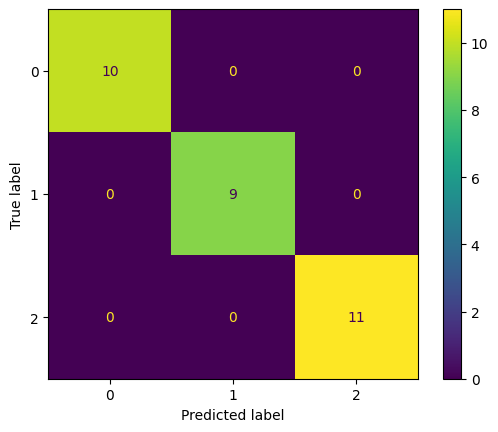

In [13]:
#11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()


In [14]:
#12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score.

from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred, average='macro'))


Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [15]:
#13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance.

from sklearn.datasets import make_classification

X_imb, y_imb = make_classification(n_classes=2, weights=[0.9, 0.1], n_samples=1000)
X_train, X_test, y_train, y_test = train_test_split(X_imb, y_imb, test_size=0.2)
model = LogisticRegression(class_weight='balanced', max_iter=200)
model.fit(X_train, y_train)
print("Imbalanced Data Accuracy:", model.score(X_test, y_test))


Imbalanced Data Accuracy: 0.865


In [16]:
#14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance.

import seaborn as sns
from sklearn.impute import SimpleImputer

titanic = sns.load_dataset('titanic').dropna(subset=['age', 'fare', 'embarked', 'sex', 'pclass', 'survived'])
X = titanic[['age', 'fare', 'pclass']]
y = titanic['survived']
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
print("Titanic Accuracy:", model.score(X_test, y_test))


Titanic Accuracy: 0.7062937062937062


In [17]:
#15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
acc_unscaled = model.score(X_test, y_test)
model.fit(X_scaled[:len(X_train)], y_train)
acc_scaled = model.score(X_scaled[len(X_train):], y_test)
print("Without Scaling:", acc_unscaled)
print("With Scaling:", acc_scaled)


Without Scaling: 0.7062937062937062
With Scaling: 0.6013986013986014


In [18]:
#16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.

from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


ROC-AUC Score: 0.38892288861689106


In [19]:
#17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy.

model = LogisticRegression(C=0.5, max_iter=200)
model.fit(X_train, y_train)
print("Custom C=0.5 Accuracy:", model.score(X_test, y_test))


Custom C=0.5 Accuracy: 0.7062937062937062


In [20]:
#18. Write a Python program to train Logistic Regression and identify important features based on model coefficients.

import numpy as np

model.fit(X_train, y_train)
print("Feature Importances:", np.abs(model.coef_).sum(axis=0))


Feature Importances: [0.04256608 0.00300163 1.15200426]


In [21]:
#19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score.

from sklearn.metrics import cohen_kappa_score

y_pred = model.predict(X_test)
print("Cohen's Kappa Score:", cohen_kappa_score(y_test, y_pred))


Cohen's Kappa Score: 0.3687197813748161


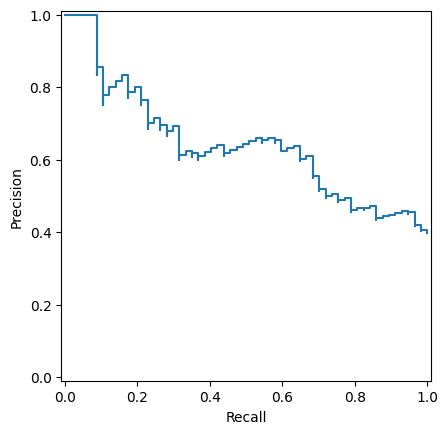

In [22]:
#20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification.

from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

y_prob = model.predict_proba(X_test)[:, 1]
prec, rec, _ = precision_recall_curve(y_test, y_prob)
disp = PrecisionRecallDisplay(precision=prec, recall=rec)
disp.plot()
plt.show()


In [23]:
#21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy.

solvers = ['liblinear', 'saga', 'lbfgs']
for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=200)
    model.fit(X_train, y_train)
    print(f"Solver: {solver}, Accuracy: {model.score(X_test, y_test)}")


Solver: liblinear, Accuracy: 0.6993006993006993
Solver: saga, Accuracy: 0.6153846153846154
Solver: lbfgs, Accuracy: 0.7062937062937062


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [24]:
#22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC).

from sklearn.metrics import matthews_corrcoef

y_pred = model.predict(X_test)
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred))


Matthews Correlation Coefficient: 0.37295667992256104


In [25]:
#23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Logistic Regression on Raw Data
model_raw = LogisticRegression(max_iter=1000)
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred_raw)
print("Accuracy on Raw Data:", acc_raw)

# 4. Standardize the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Logistic Regression on Scaled Data
model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)
print("Accuracy on Standardized Data:", acc_scaled)


Accuracy on Raw Data: 0.956140350877193
Accuracy on Standardized Data: 0.9736842105263158


In [27]:
#24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Define parameter grid for C
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# 5. GridSearchCV with cross-validation (cv=5)
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

# 6. Best C and corresponding accuracy
print("Best C value:", grid.best_params_['C'])
print("Best cross-validation accuracy:", grid.best_score_)

# 7. Evaluate on test set
best_model = grid.best_estimator_
test_accuracy = best_model.score(X_test_scaled, y_test)
print("Test set accuracy with best C:", test_accuracy)


Best C value: 10
Best cross-validation accuracy: 0.9758241758241759
Test set accuracy with best C: 0.9736842105263158


In [29]:
#25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib  # for saving and loading models
import os

# 1. Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 4. Save the trained model
model_filename = "logistic_model.joblib"
joblib.dump(model, model_filename)
print("Model saved as:", model_filename)

# 5. Load the saved model
loaded_model = joblib.load(model_filename)

# 6. Make predictions and evaluate
y_pred = loaded_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of loaded model:", accuracy)


Model saved as: logistic_model.joblib
Accuracy of loaded model: 0.956140350877193


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
